In [1]:
import sys
from pathlib import Path

p = Path('.').resolve()
sys.path.append(str(p.parent))
sys.path

['/home/user/miniconda/envs/py36/lib/python36.zip',
 '/home/user/miniconda/envs/py36/lib/python3.6',
 '/home/user/miniconda/envs/py36/lib/python3.6/lib-dynload',
 '',
 '/home/user/miniconda/envs/py36/lib/python3.6/site-packages',
 '/home/user/miniconda/envs/py36/lib/python3.6/site-packages/IPython/extensions',
 '/home/user/.ipython',
 '/app/biggraph']

In [2]:
from utils.data_utils import *
from utils.faiss_utils import *

Loading faiss with AVX2 support.


In [3]:
import matplotlib.pyplot as plt
import linecache
    
    
def plot_data(X_pca, Y, labels=None, n=int(10e4), loc="best", _3d=False, title=None):
    """
    Plotting function.
    Todo: extend to 3d.
    """
    if labels is None:
        labels = {i: i for i in np.unique(Y)}
    
    ind = np.random.randint(len(X_pca), size=n)
    x1 = X_pca[ind, 0]
    x2 = X_pca[ind, 1]
    y = Y[ind].flatten().astype("int")
    cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
    cdict = {value: cols[pos] for (pos, value) in enumerate(labels.keys())}
    fig, ax = plt.subplots(figsize=(20, 20))
    for key in labels:
        ix = np.where(y==int(key))
        label = labels[key]
        ax.scatter(x1[ix], x2[ix], c=cdict[key], label=label, s=0.1)
    
    ax.legend(prop={'size':20}, markerscale=20, loc=loc)
    if title is not None:
        ax.set_title(title, fontsize=20)
    plt.show()


def load_XY(basename):
    """
    Load embeddings (X) and possibly the
    labels (Y) of the graph {basename}.
    """
    model_path = Path("/data/models") / basename
    print("Loading data..")
    X, Y = load_data(model_path)
    classes = len(np.unique(Y))
    print("X shape: {}".format(X.shape))
    return X, Y


def centroid_neigh(basename, k_means, X, n=15):
    """
    Find the n-nearest neighbours to k-means
    cluster centroids.
    """
    d = X.shape[1]
    index = faiss.IndexFlatL2(d)
    index.add(X)
    D, I = index.search(k_means.centroids, n)
    entities = get_entities_list(basename)
    find_neighbours(basename, I, entities)


def find_neighbours(basename, idx, ent_list):
    """
    Helper function for centroid_neigh.
    """
    
    urls_file = Path('/data/graphs/') / basename / (basename + '.urls')
    f = urls_file.as_posix()
    for pos, cluster in enumerate(idx):
        print("\x1b[0;35;43m Cluster {} \x1b[0m".format(pos))
        for node in cluster:
            line = ent_list[node]
            print(linecache.getline(f, line + 1))

# CNR-2000

Per "CNR-2000" (ancora) non ho a disposizione delle label basate sui domini, per cui mostro soltanto l'algoritmo di k-means fatto girare sugli embedding.

In [4]:
basename = "cnr-2000"
X, Y = load_XY(basename)
cnr = kmeans(X, 6)

Loading data..
Labels not defined
X shape: (325557, 64)


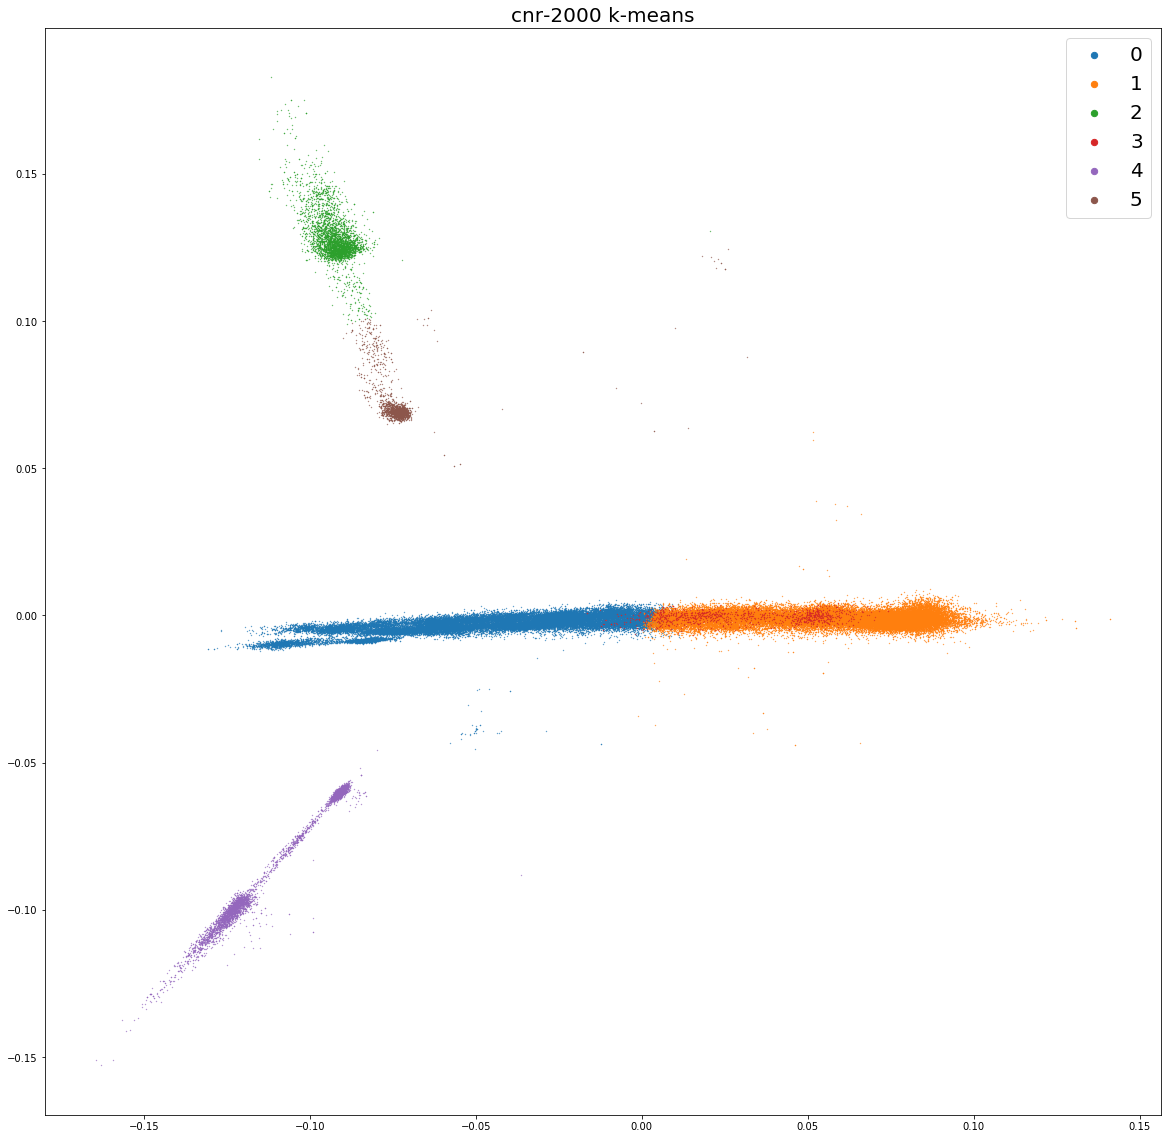

In [5]:
D, I = cnr.index.search(X, 1)
cnr_pca = PCA(X)
plot_data(cnr_pca, I, title="cnr-2000 k-means")

Vediamo quali sono i (15) nodi più vicini ai centroidi dei cluster calcolati usando k-means.

In [6]:
centroid_neigh(basename, cnr, X)

 Cluster 0 
http://www.istc.cnr.it/cessba/modules.php?op=modload&name=Members_List&file=index&letter=All&sortby=uname&authid=82b8800d44c714ac8ff4a678fb1ce8af

http://m1.ira.cnr.it/pipermail/ira-users/2003/001322.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2002/000021.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001614.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001535.html

http://sti.iriti.cnr.it/~de_paoli/feno11.htm

http://m1.ira.cnr.it/pipermail/ira-users/2003/001827.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001120.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001755.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001945.html

http://m1.ira.cnr.it/pipermail/ira-users/2003/000932.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001530.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001662.html

http://m1.ira.cnr.it/pipermail/ira-users/2003/001787.html

http://m1.ira.cnr.it/pipermail/ira-bo-stud/2003/001216.html

 Cluster 1

# Indochina-2004

Per "indochina-2004" possiamo sia far girare k-means per calcolare un clustering, sia valutare il clustering indotto dai domini (th, vn, la, kh, mm).

Loading data..
X shape: (7414768, 64)


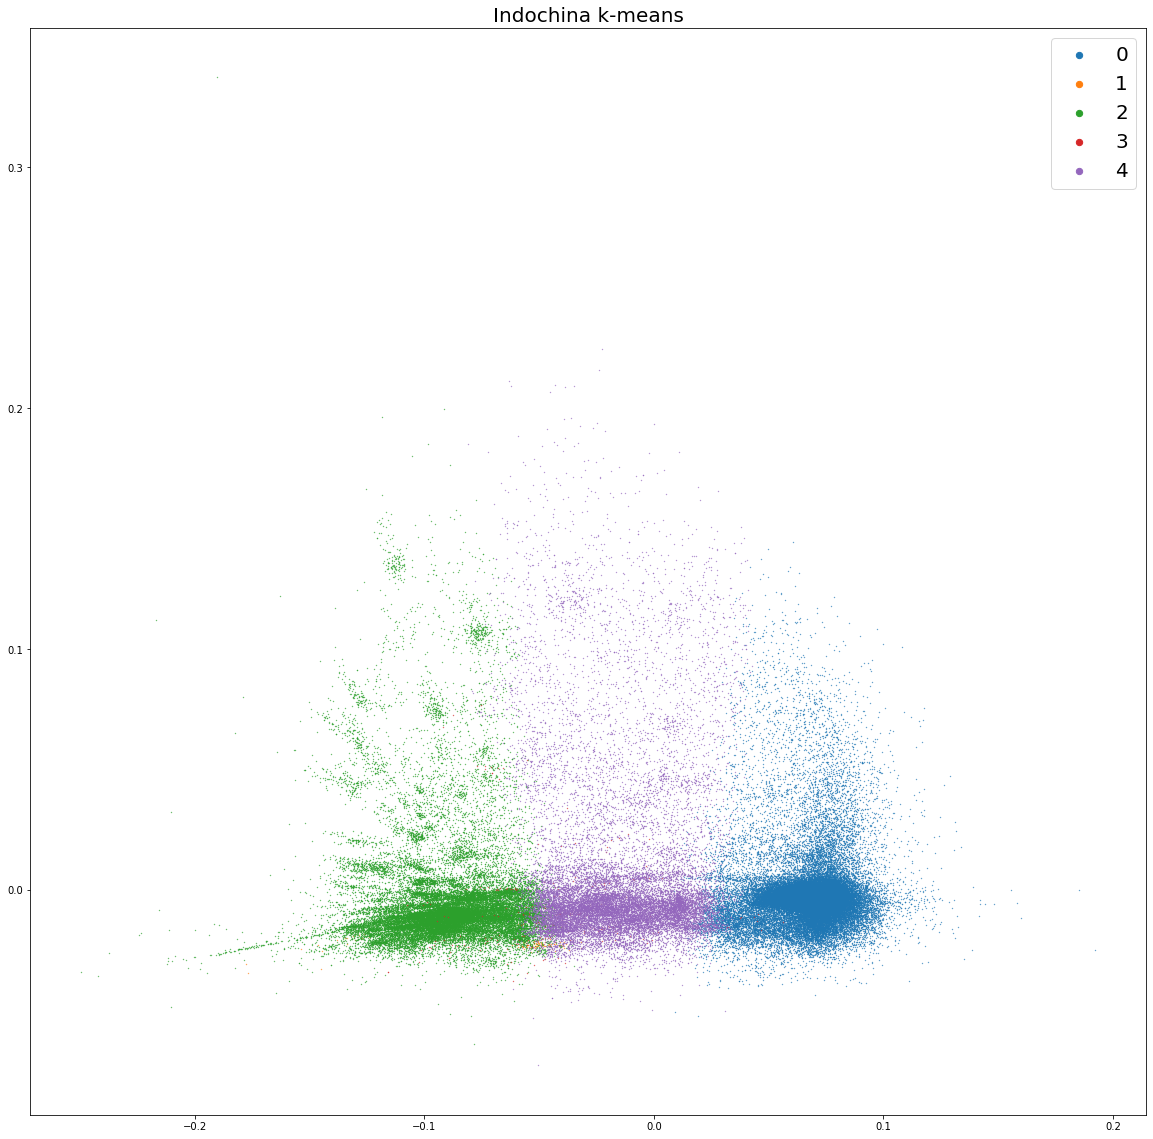

In [7]:
basename = "indochina-2004"
X, Y = load_XY(basename)
indo_kmeans = kmeans(X, 5)
indo_pca = PCA(X)
D, I = indo_kmeans.index.search(X, 1)
plot_data(indo_pca, I, title="Indochina k-means")

Controlliamo anche in questo caso i nodi più vicini ai centroidi trovati da k-means.

In [8]:
centroid_neigh(basename, indo_kmeans, X)

 Cluster 0 
http://www.yupparaj.ac.th/DigitalLibrary/snet6/envi3/who/who.htm

http://www.uni.net.th/~02_2543/CH6/Menu_Frame_6.htm

http://intra.chiangmai.ac.th/~pr_cmu/news2547/daily-news_010.html

http://www.la.ubu.ac.th/thai/Web_Stu/Data/Meditation_Tour/two.html

http://province.moph.go.th/songkhla/uc/MasterCup/Hosp.asp?Amphur=900300&Tambol=900312&CATM=90031207

http://www.science.cmu.ac.th/observatory/Research/abstract/EU%20Hya.html

http://nongkhai.ect.go.th/thai/mp/18aug44/sumright.html

http://www.uni.net.th/~02_2543/CH11/Menu_CH11_1.htm

http://www.danangpt.vnn.vn/danang/vanhoa/vchngthuat/index.htm

http://www.hcm.edu.vn/cityweb/GV_Mon.idc?vfile=05HB01GVC3&mon=SI

http://lecture.compsci.buu.ac.th/~tomkanok/310416/

http://dns.vista.gov.vn/TestEnglish/anpham/vdn/1999/so3/envi/main.htm

http://www.vista.gov.vn/VistaEnglish/VistaWeb/anphamdientu/main.htm

http://ssnet.doae.go.th/ssnet2/MIS/ror_44/rpt_3_15.htm

http://cai.md.chula.ac.th/lesson/anatomy/picture/quiz/q11.htm

 Cluster 

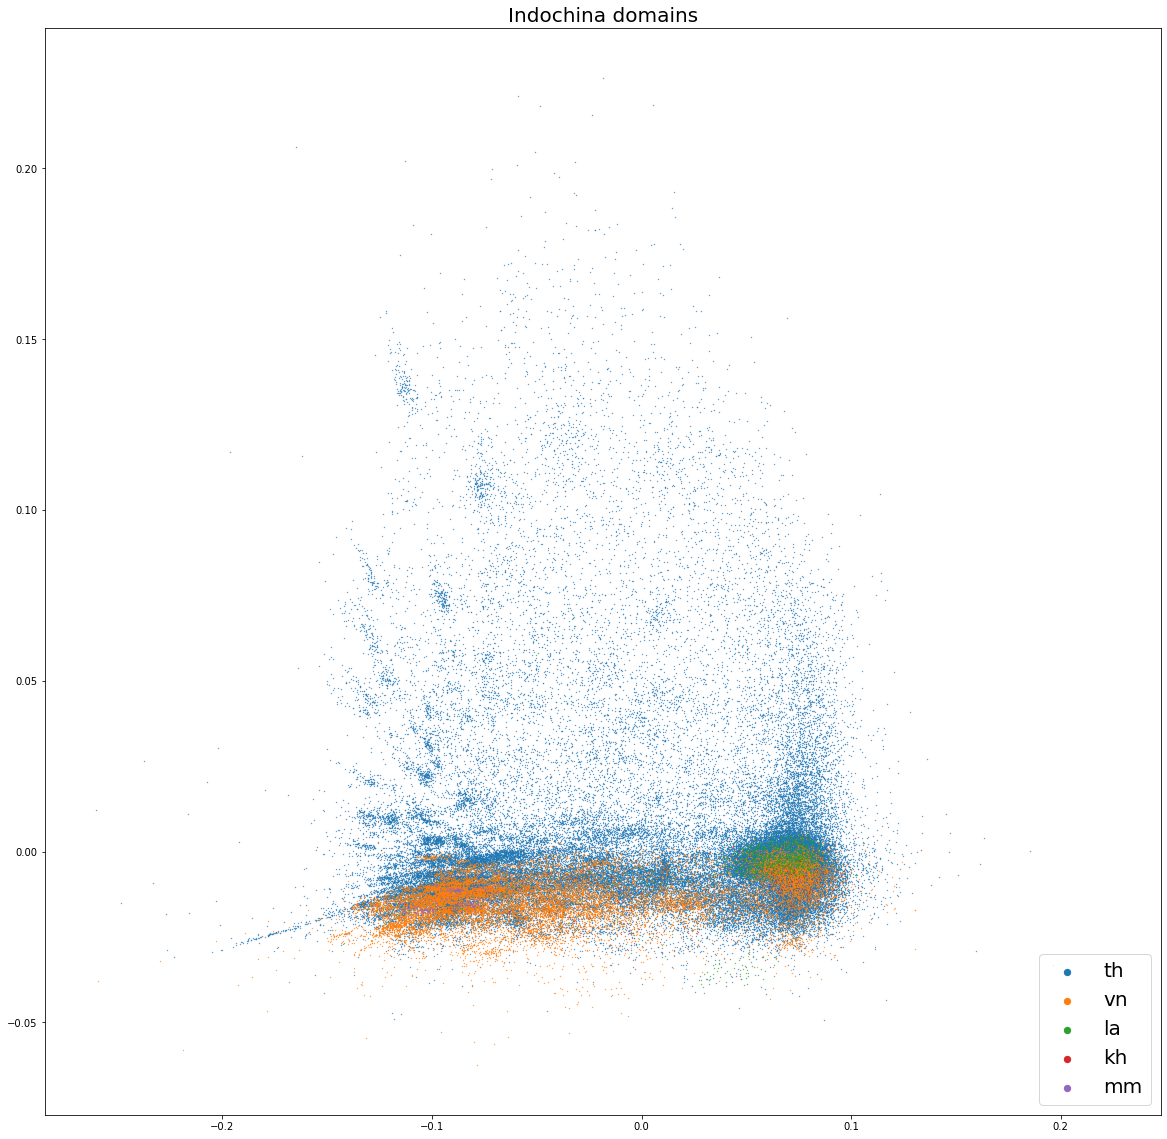

In [9]:
labels_dict = Path("/data/models") / basename / "labels.json"
with labels_dict.open() as f:
    lab = json.load(f)

plot_data(indo_pca, Y, labels=lab['labels'], loc="lower right", title="Indochina domains")

Il clustering fatto usando i domini sembra pessimo. In effetti questo viene confermato dal silhouette score:

In [10]:
from sklearn import metrics

metrics.silhouette_score(X, Y, metric='euclidean', sample_size=1000)

-0.32629895

In [11]:
help(metrics.silhouette_score)

Help on function silhouette_score in module sklearn.metrics.cluster.unsupervised:

silhouette_score(X, labels, metric='euclidean', sample_size=None, random_state=None, **kwds)
    Compute the mean Silhouette Coefficient of all samples.
    
    The Silhouette Coefficient is calculated using the mean intra-cluster
    distance (``a``) and the mean nearest-cluster distance (``b``) for each
    sample.  The Silhouette Coefficient for a sample is ``(b - a) / max(a,
    b)``.  To clarify, ``b`` is the distance between a sample and the nearest
    cluster that the sample is not a part of.
    Note that Silhouette Coefficient is only defined if number of labels
    is 2 <= n_labels <= n_samples - 1.
    
    This function returns the mean Silhouette Coefficient over all samples.
    To obtain the values for each sample, use :func:`silhouette_samples`.
    
    The best value is 1 and the worst value is -1. Values near 0 indicate
    overlapping clusters. Negative values generally indicate tha

In [12]:
indo_3d = PCA(X, out=3)

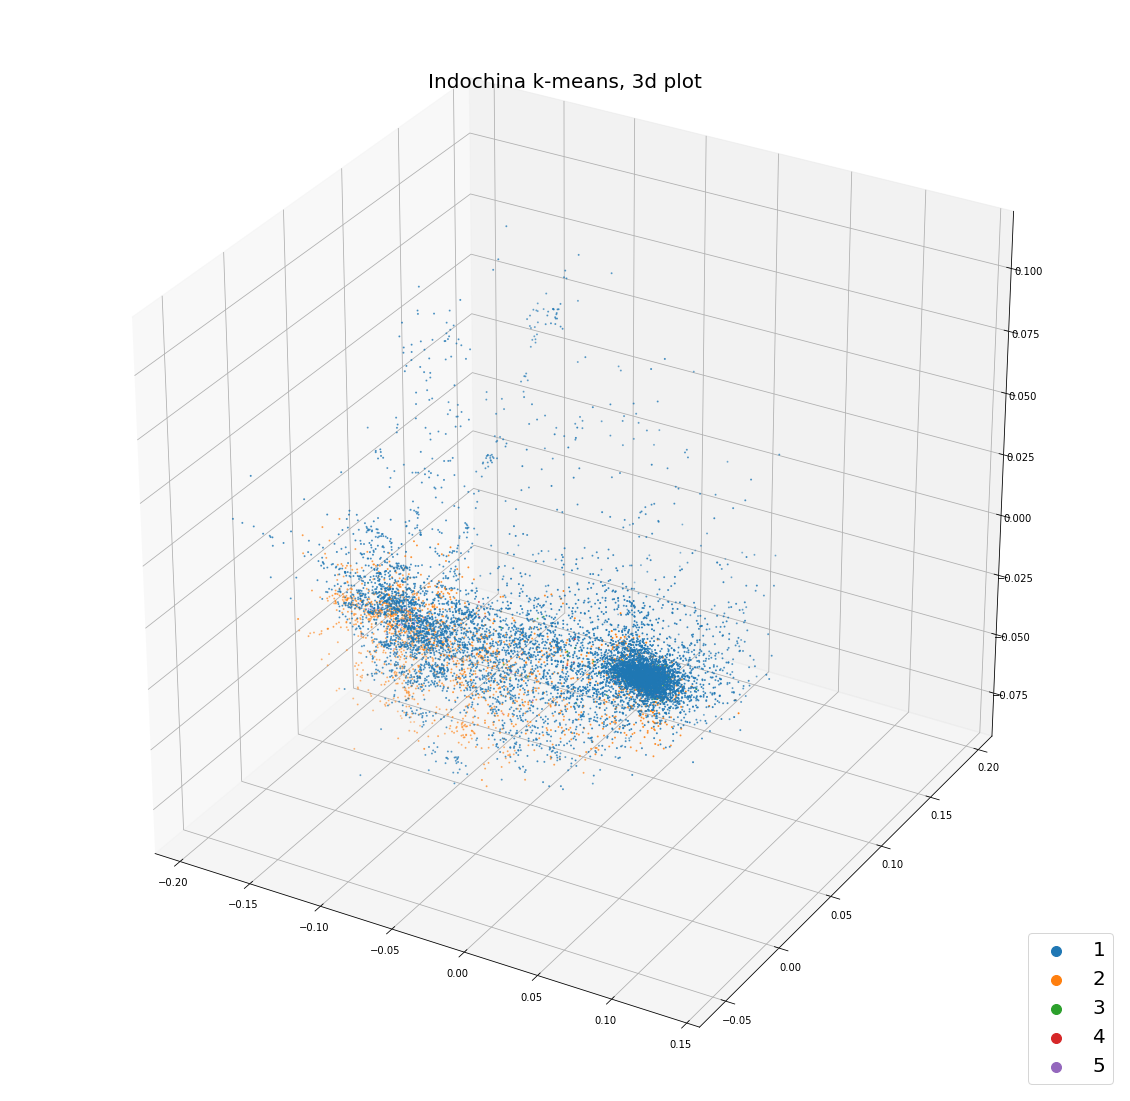

In [13]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import


n = 10000
ind = np.random.randint(len(indo_3d), size=n)
xs = indo_3d[ind, 0]
ys = indo_3d[ind, 1]
zs = indo_3d[ind, 2]

lab = Y[ind].flatten().astype("int")
val = np.unique(lab)
cols = plt.rcParams['axes.prop_cycle'].by_key()['color']
cdict = {value: cols[pos] for (pos, value) in enumerate(val)}
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111, projection='3d')
for g in val:
    ix = np.where(lab==g)
    ax.scatter(xs[ix], ys[ix], zs[ix], c=cdict[g], label=g, s=1)

ax.legend(prop={'size':20}, markerscale=10, loc="lower right")
ax.set_title("Indochina k-means, 3d plot", fontsize=20)
plt.show()